# Insurance Charges Dataset

In [46]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/insurance[1].csv')
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.duplicated().sum()

np.int64(1)

In [48]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.0000

In [49]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
print(f"New shape of the DataFrame: {df.shape}")

Number of duplicate rows after removal: 0
New shape of the DataFrame: (1337, 7)


In [50]:
# Select 'age' as the independent variable (X) and reshape it for scikit-learn
X = df['age'].values.reshape(-1, 1)
# Select 'charges' as the dependent variable (y)
y = df['charges'].values

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1069, 1)
Shape of X_test: (268, 1)
Shape of y_train: (1069,)
Shape of y_test: (268,)


In [51]:
# Get the total number of rows in the original DataFrame
total_rows_df = df.shape[0]
print(f"Total rows in original DataFrame: {total_rows_df}")

# Get the number of rows in the training and testing sets
total_rows_train = X_train.shape[0]
total_rows_test = X_test.shape[0]
print(f"Rows in training set: {total_rows_train}")
print(f"Rows in testing set: {total_rows_test}")

# Sum the rows from training and testing sets
combined_rows = total_rows_train + total_rows_test
print(f"Combined rows (training + testing): {combined_rows}")

# Verify if the combined rows match the original DataFrame rows
if total_rows_df == combined_rows:
    print("All data from the original dataset has been used in the training and testing sets.")
else:
    print("There is a mismatch in the number of rows.")

Total rows in original DataFrame: 1337
Rows in training set: 1069
Rows in testing set: 268
Combined rows (training + testing): 1337
All data from the original dataset has been used in the training and testing sets.


In [52]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [53]:
# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.0951
Mean Absolute Error (MAE): 9657.79
Mean Squared Error (MSE): 166275348.23


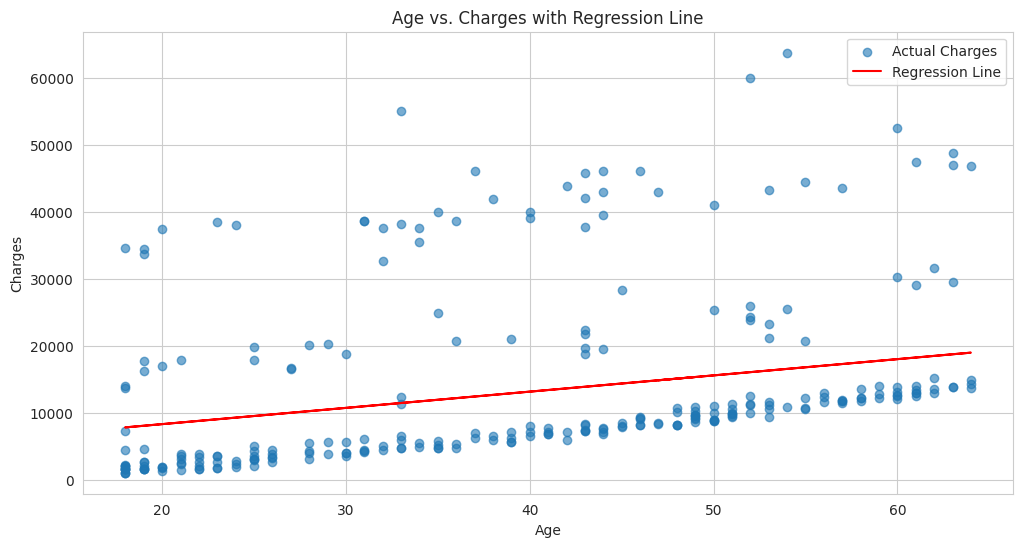

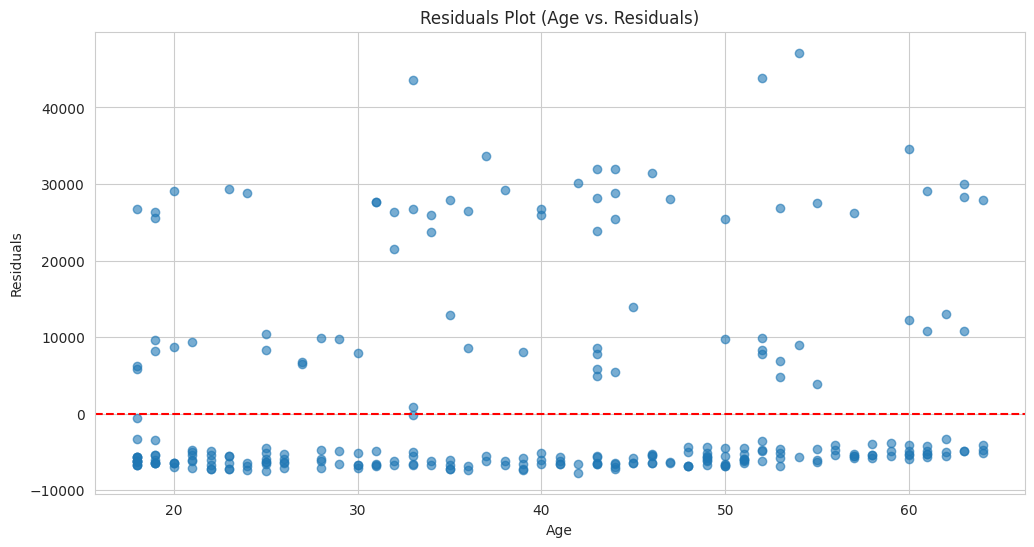

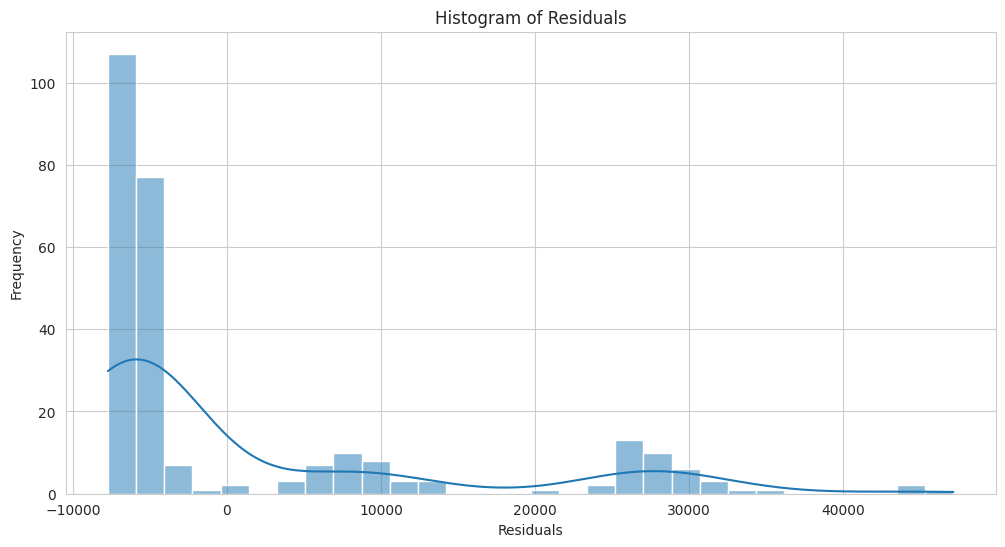

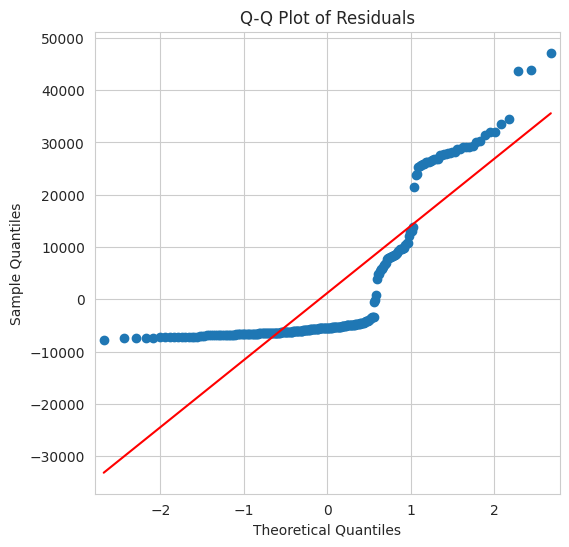

Visualization of linear regression results completed.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Scatter plot of data with regression line
plt.figure(figsize=(12, 6))
# Plot actual charges against age
plt.scatter(X_test, y_test, alpha=0.6, label='Actual Charges')
# Plot the regression line (predicted charges against age)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges with Regression Line')
plt.legend()
plt.show()

# 2. Residuals plot
# Calculate the residuals (actual values - predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
# Plot residuals against the independent variable (age)
plt.scatter(X_test, residuals, alpha=0.6)
# Draw a horizontal line at y=0 to easily visualize deviations
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Age vs. Residuals)')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(12, 6))
# Plot a histogram of the residuals to check their distribution
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# 4. Q-Q plot of residuals
plt.figure(figsize=(6, 6))
# Create a Q-Q plot to assess if residuals are normally distributed
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()

print("Visualization of linear regression results completed.")

## Feature Engineering and Selection


In [55]:
import pandas as pd

# Select the specified features from the DataFrame
X_features = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region']].copy()

# Apply one-hot encoding to categorical columns and drop the original columns
X_features = pd.get_dummies(X_features, columns=['sex', 'smoker', 'region'], drop_first=False)

# Display the first few rows of the encoded DataFrame and its info to verify
print("First 5 rows of X_features after encoding:")
print(X_features.head())
print("\nDataFrame Info for X_features:")
X_features.info()

First 5 rows of X_features after encoding:
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False  

DataFrame Info for X_features:
<class 'pandas.core.frame.Data

In [56]:
from sklearn.model_selection import train_test_split

y = df['charges']

# Split the encoded data into training and testing sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train_multi:", X_train_multi.shape)
print("Shape of X_test_multi:", X_test_multi.shape)
print("Shape of y_train_multi:", y_train_multi.shape)
print("Shape of y_test_multi:", y_test_multi.shape)

Shape of X_train_multi: (1069, 11)
Shape of X_test_multi: (268, 11)
Shape of y_train_multi: (1069,)
Shape of y_test_multi: (268,)


## Train Multiple Linear Regression Model


In [57]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model for multiple features
model_multi = LinearRegression()

# Train the model using the prepared training data
model_multi.fit(X_train_multi, y_train_multi)

print("Multiple Linear Regression model trained successfully.")

Multiple Linear Regression model trained successfully.


## Evaluate Multiple Linear Regression Model


In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test set using the trained multiple linear regression model
y_pred_multi = model_multi.predict(X_test_multi)

# Calculate R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2_multi = r2_score(y_test_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

# Print the evaluation metrics
print(f"R-squared (Multiple Linear Regression): {r2_multi:.4f}")
print(f"Mean Absolute Error (MAE) (Multiple Linear Regression): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE) (Multiple Linear Regression): {mse_multi:.2f}")

R-squared (Multiple Linear Regression): 0.8069
Mean Absolute Error (MAE) (Multiple Linear Regression): 4177.05
Mean Squared Error (MSE) (Multiple Linear Regression): 35478020.68


## Visualize Multiple Linear Regression Results


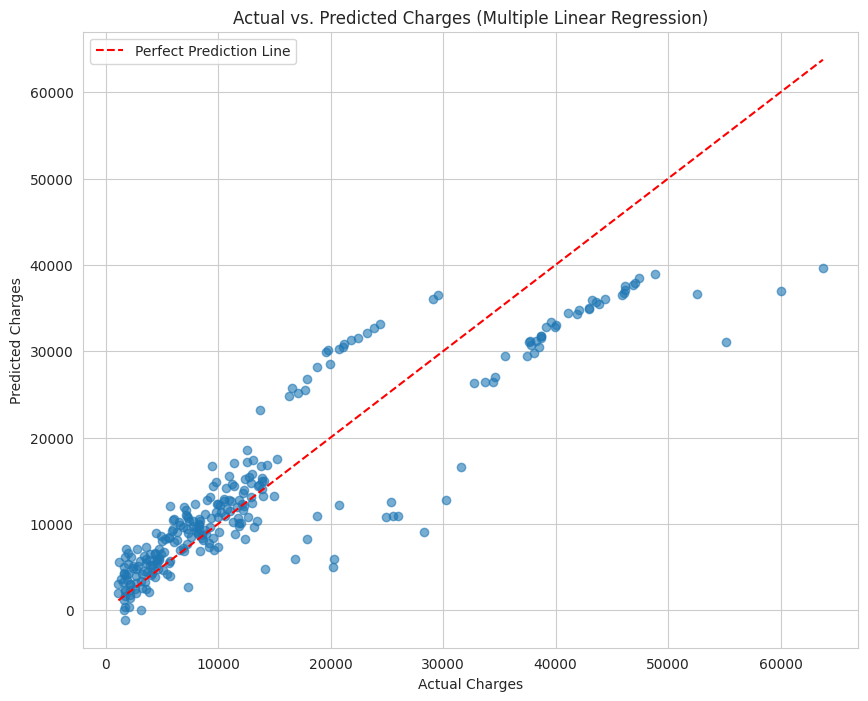

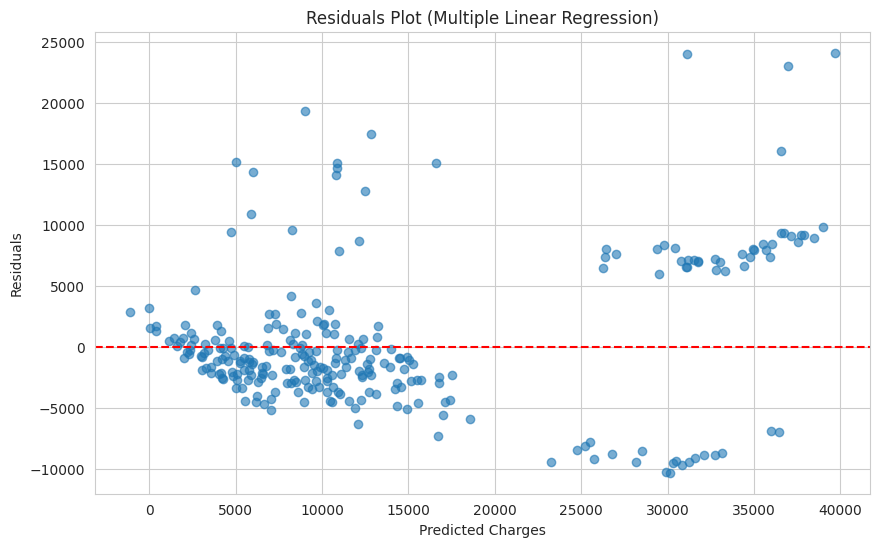

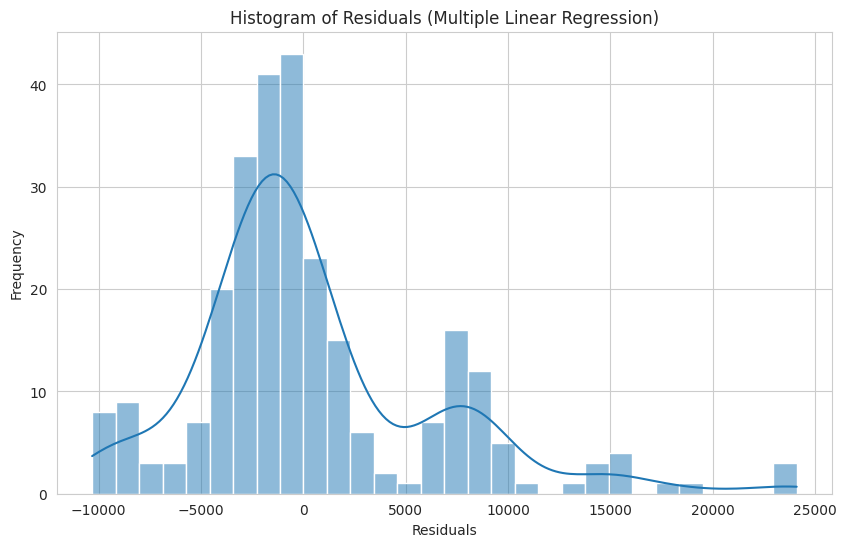

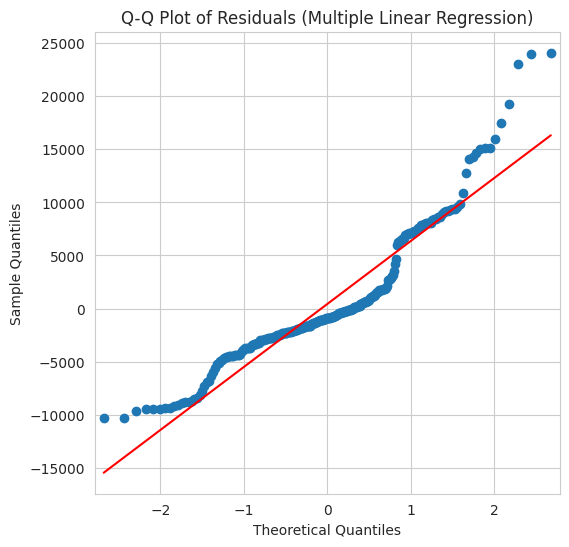

Visualization of multiple linear regression results completed.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Scatter plot of actual vs. predicted charges
plt.figure(figsize=(10, 8))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([min(y_test_multi), max(y_test_multi)], [min(y_test_multi), max(y_test_multi)], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Multiple Linear Regression)')
plt.legend()
plt.show()

# 2. Residuals plot
# Calculate the residuals (actual values - predicted values)
residuals_multi = y_test_multi - y_pred_multi

plt.figure(figsize=(10, 6))
# Plot predicted values against residuals
plt.scatter(y_pred_multi, residuals_multi, alpha=0.6)
# Draw a horizontal line at y=0 to easily visualize deviations
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Multiple Linear Regression)')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(10, 6))
# Plot a histogram of the residuals to check their distribution
sns.histplot(residuals_multi, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Multiple Linear Regression)')
plt.show()

# 4. Q-Q plot of residuals
plt.figure(figsize=(6, 6))
# Create a Q-Q plot to assess if residuals are normally distributed
sm.qqplot(residuals_multi, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Multiple Linear Regression)')
plt.show()

print("Visualization of multiple linear regression results completed.")

## Data Transformation


In [60]:
import numpy as np

# Apply a natural logarithm transformation to the 'charges' column
df['charges_log'] = np.log(df['charges'])

# Display the first few rows of the DataFrame to verify the new 'charges_log' column
print("DataFrame with 'charges_log' column:")
df.head()

DataFrame with 'charges_log' column:


,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


## Advanced Feature Engineering


In [61]:
X_features['smoker_age_interaction'] = X_features['age'] * X_features['smoker_yes']
X_features['smoker_bmi_interaction'] = X_features['bmi'] * X_features['smoker_yes']

# Display the first few rows of the updated DataFrame to verify the new columns
print("X_features DataFrame with interaction terms:")
print(X_features.head())

print("\nDataFrame Info for X_features after adding interaction terms:")
X_features.info()

X_features DataFrame with interaction terms:
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0             False             False             False              True   
1             False             False              True             False   
2             False             False              True             False   
3             False              True             False             False   
4             False              True             False             False   

   smoker_age_interaction  smoker_bmi_interaction  
0

## Prepare Transformed Data


In [62]:
from sklearn.model_selection import train_test_split

# 1. Set the independent variables X_enhanced to the X_features DataFrame
X_enhanced = X_features

# 2. Set the dependent variable y_log to the charges_log column from the original df DataFrame
y_log = df['charges_log']

# 3. Split X_enhanced and y_log into training and testing sets
X_train_enhanced, X_test_enhanced, y_train_log, y_test_log = train_test_split(X_enhanced, y_log, test_size=0.2, random_state=42)

# 4. Print the shapes of the new training and testing sets
print("Shape of X_train_enhanced:", X_train_enhanced.shape)
print("Shape of X_test_enhanced:", X_test_enhanced.shape)
print("Shape of y_train_log:", y_train_log.shape)
print("Shape of y_test_log:", y_test_log.shape)

Shape of X_train_enhanced: (1069, 13)
Shape of X_test_enhanced: (268, 13)
Shape of y_train_log: (1069,)
Shape of y_test_log: (268,)


## Train and Evaluate Enhanced Linear Regression Model


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the Linear Regression model for enhanced features and log-transformed target
model_enhanced = LinearRegression()

# Train the model using the prepared training data
model_enhanced.fit(X_train_enhanced, y_train_log)

# Make predictions on the test set
y_pred_enhanced = model_enhanced.predict(X_test_enhanced)

# Calculate evaluation metrics
r2_enhanced = r2_score(y_test_log, y_pred_enhanced)
mae_enhanced = mean_absolute_error(y_test_log, y_pred_enhanced)
mse_enhanced = mean_squared_error(y_test_log, y_pred_enhanced)

# Print the evaluation metrics
print(f"R-squared (Enhanced Model with Log-transformed Target): {r2_enhanced:.4f}")
print(f"Mean Absolute Error (MAE) (Enhanced Model with Log-transformed Target): {mae_enhanced:.4f}")
print(f"Mean Squared Error (MSE) (Enhanced Model with Log-transformed Target): {mse_enhanced:.4f}")

# Optionally, transform back to original scale for MAE/MSE if comparison is needed with original model
# Note: This is an approximation as np.exp(E[log(y)]) != E[y]
y_pred_original_scale = np.exp(y_pred_enhanced)
y_test_original_scale = np.exp(y_test_log)

mae_original_scale = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)

print(f"\nMean Absolute Error (MAE) (Original Scale, for comparison): {mae_original_scale:.2f}")
print(f"Mean Squared Error (MSE) (Original Scale, for comparison): {mse_original_scale:.2f}")

R-squared (Enhanced Model with Log-transformed Target): 0.8709
Mean Absolute Error (MAE) (Enhanced Model with Log-transformed Target): 0.2055
Mean Squared Error (MSE) (Enhanced Model with Log-transformed Target): 0.1198

Mean Absolute Error (MAE) (Original Scale, for comparison): 3023.94
Mean Squared Error (MSE) (Original Scale, for comparison): 34328892.68


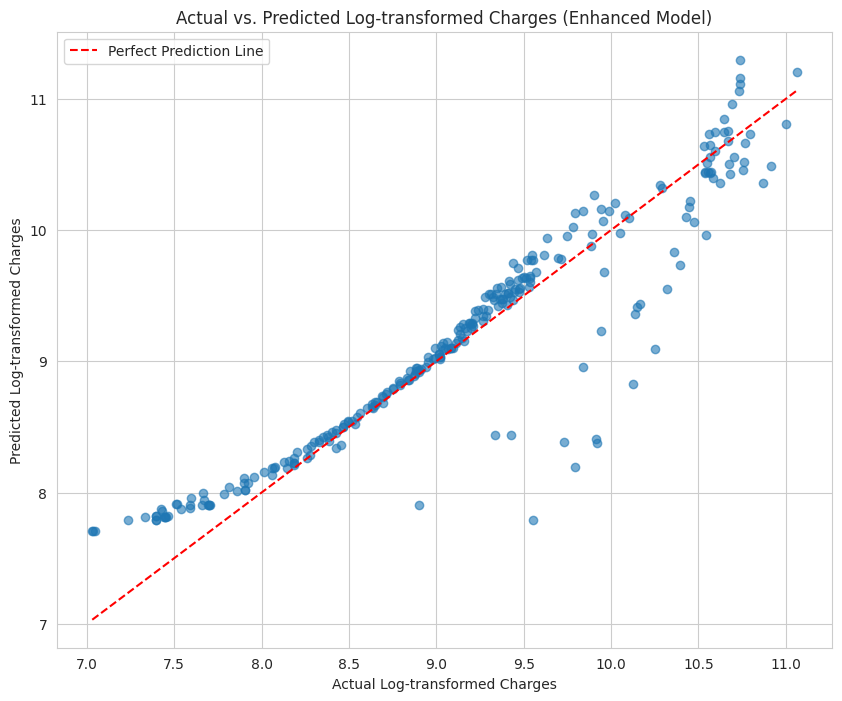

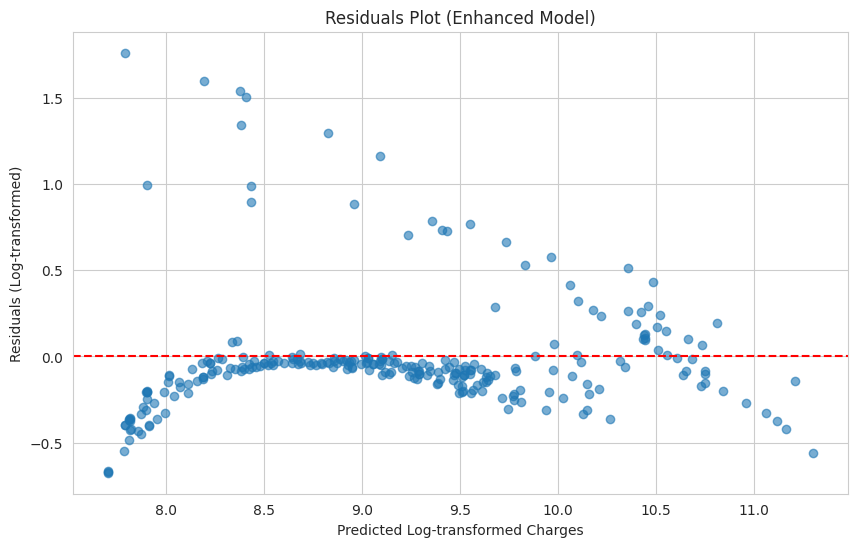

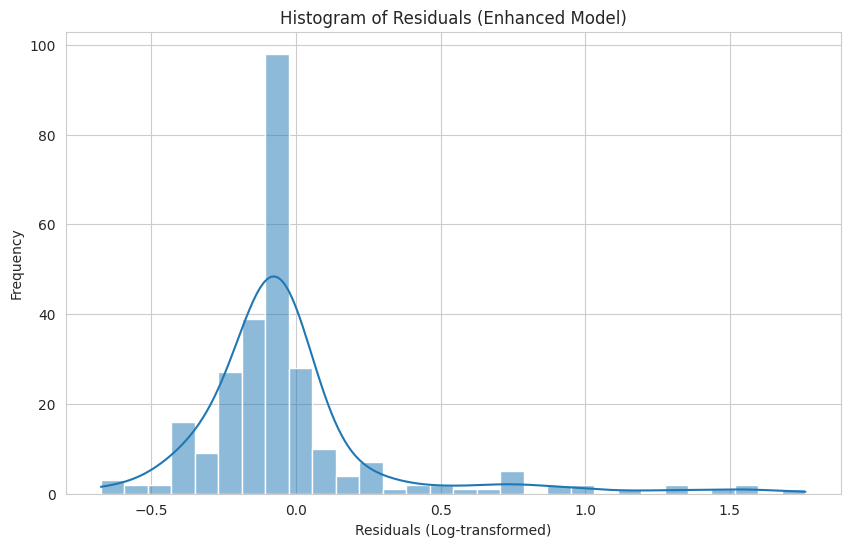

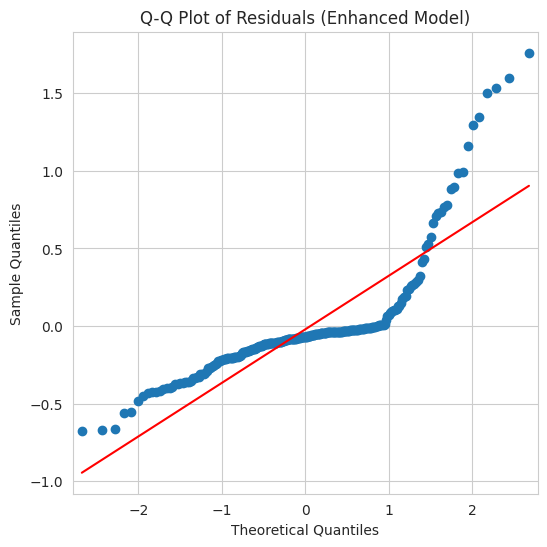

Visualization of enhanced linear regression results completed.


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Scatter plot of actual vs. predicted charges (on log scale)
plt.figure(figsize=(10, 8))
plt.scatter(y_test_log, y_pred_enhanced, alpha=0.6)
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Log-transformed Charges')
plt.ylabel('Predicted Log-transformed Charges')
plt.title('Actual vs. Predicted Log-transformed Charges (Enhanced Model)')
plt.legend()
plt.show()

# 2. Residuals plot
# Calculate the residuals (actual values - predicted values)
residuals_enhanced = y_test_log - y_pred_enhanced

plt.figure(figsize=(10, 6))
# Plot predicted values against residuals
plt.scatter(y_pred_enhanced, residuals_enhanced, alpha=0.6)
# Draw a horizontal line at y=0 to easily visualize deviations
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Log-transformed Charges')
plt.ylabel('Residuals (Log-transformed)')
plt.title('Residuals Plot (Enhanced Model)')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(10, 6))
# Plot a histogram of the residuals to check their distribution
sns.histplot(residuals_enhanced, kde=True, bins=30)
plt.xlabel('Residuals (Log-transformed)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Enhanced Model)')
plt.show()

# 4. Q-Q plot of residuals
plt.figure(figsize=(6, 6))
# Create a Q-Q plot to assess if residuals are normally distributed
sm.qqplot(residuals_enhanced, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Enhanced Model)')
plt.show()

print("Visualization of enhanced linear regression results completed.")


charges

Data Type: Float (float64)
Description: Individual medical costs billed by health insurance (the target variable).
Range: $1121.87 to $63770.43.
Average: Approximately $13270.42.
Standard Deviation: $12110.01.
Insight: The wide range and high standard deviation indicate a highly skewed distribution (many low costs, a few very high costs), making direct prediction challenging without transformations.


Data Quality
Missing Values: There are no missing values in any of the columns.
Duplicate Entries: One duplicate row was identified and successfully removed, ensuring data uniqueness.